[Dimension reduction](https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29)

In [13]:
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap as umap
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
train = pd.read_csv('../input/reduction/sign_mnist_test.csv')
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       120       107  
1       184       184       182       180  
2       226       225       224       222  
3       230       240       253       255  
4        49        46        46        53  

[5 rows x 785 columns]

In [25]:
#picking only the first 10 labels
train = train[train['label'] < 10]
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values



array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [203, 205, 207, ..., 240, 253, 255],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]])

In [3]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1200,height=700)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [4]:
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
    # tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1200,height=700)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

## PCA

**Définition**:
```
Les composantes principales sont une technique de réduction de dimension qui permet de transformer un ensemble de variables corrélées en un nouvel ensemble de variables non corrélées appelées composantes principales. Ces composantes sont ordonnées par importance, la première composante expliquant la plus grande part de la variance des données.
```
**Quand l'utiliser**:
```
Les composantes principales peuvent être utilisées lorsque vous avez un grand nombre de variables corrélées et que vous souhaitez réduire la dimension de vos données tout en conservant un maximum d'informations.
```
**Pourquoi l'utiliser**:
```
Les composantes principales permettent de réduire la complexité des données en conservant la plupart de la variance, ce qui facilite l'analyse et la visualisation des données. Elles peuvent également être utilisées comme entrée pour d'autres algorithmes d'apprentissage automatique.
```
**Points forts**:
```
Réduction de la dimension des données en conservant un maximum d'informations.
Facilité d'interprétation et de visualisation des données.
Peut être utilisé comme entrée pour d'autres algorithmes d'apprentissage automatique.
```
**Points faibles**:
```
La sélection du nombre optimal de composantes principales peut être subjective.
Les composantes principales ne sont pas facilement interprétables en termes de signification des variables originales.
Les composantes principales peuvent ne pas préserver certaines relations non linéaires entre les variables originales.
```

In [5]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

In [6]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Duration: 0.0853729248046875 seconds


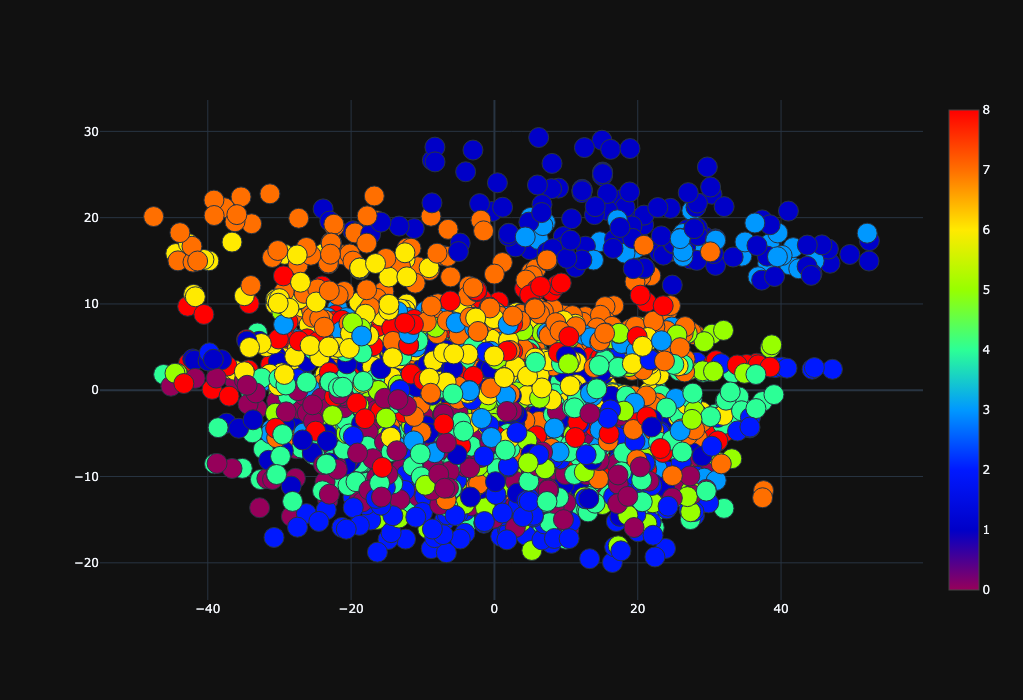

In [7]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])


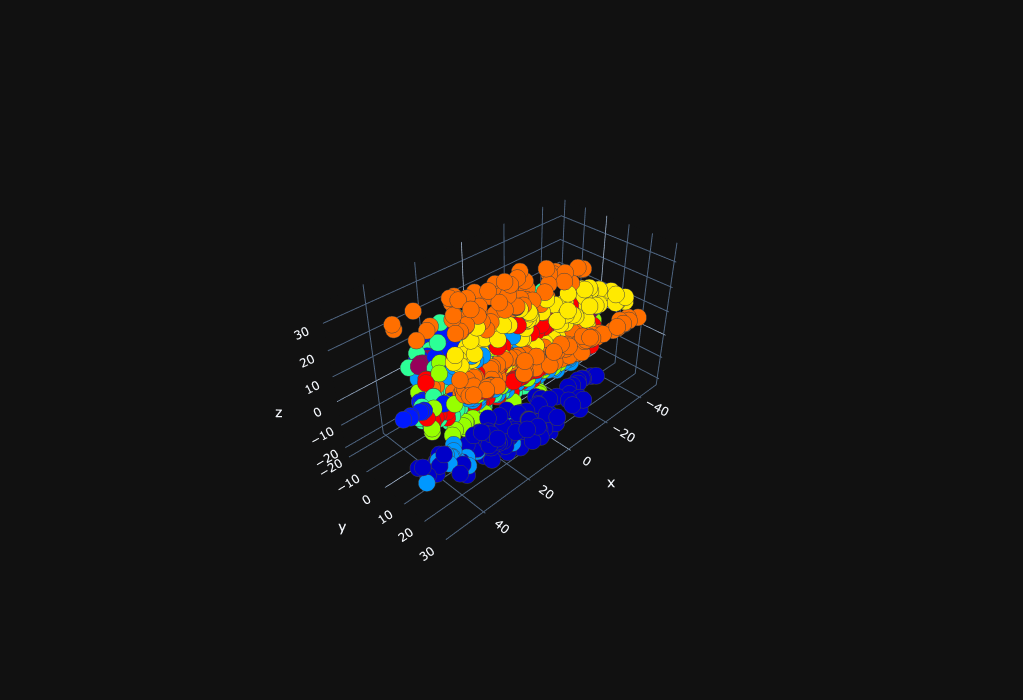

In [8]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

## t-SNE

**Définition:**
```
t-SNE (t-Distributed Stochastic Neighbor Embedding) est un algorithme de réduction de dimension non linéaire, utilisé pour visualiser des données à haute dimension dans un espace de dimension réduite. Il utilise une approche probabiliste pour représenter les similarités entre les échantillons d'origine et les points transformés dans l'espace réduit.
```
**Quand l'utiliser:**
```
t-SNE peut être utilisé lorsque vous souhaitez représenter graphiquement des données à haute dimension tout en conservant les structures et les relations entre les échantillons.
```
**Pourquoi l'utiliser:**
```
t-SNE permet de visualiser des données complexes à haute dimension dans un espace de dimension réduite, ce qui facilite l'identification de structures, de clusters et de tendances dans les données.
```
**Points forts:**
```
Capable de capturer des structures non linéaires dans les données.
Bon pour la visualisation de groupes ou de clusters.
Peut mettre en évidence des relations complexes entre les échantillons.
```
**Points faibles:**
```
La visualisation obtenue dépend des paramètres choisis et peut varier d'une exécution à l'autre.
Les distances entre les échantillons peuvent être déformées dans l'espace réduit, ce qui peut donner une impression faussée de la distance réelle entre les points.
```

In [9]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 5.483633279800415 seconds


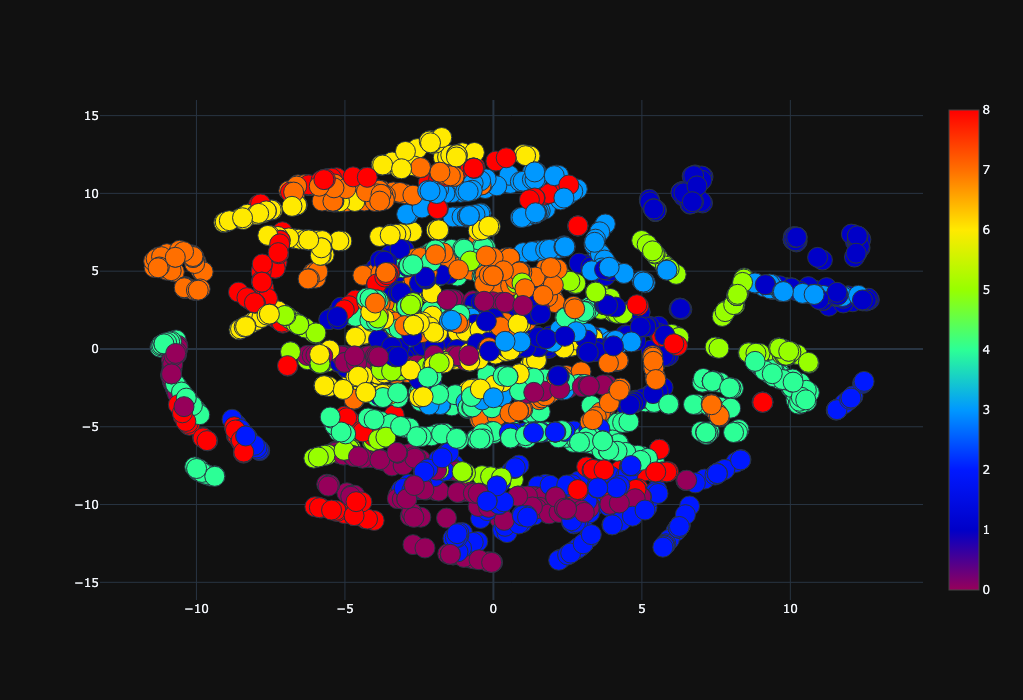

In [10]:
plot_2d(tsne[:, 0],tsne[:, 1])


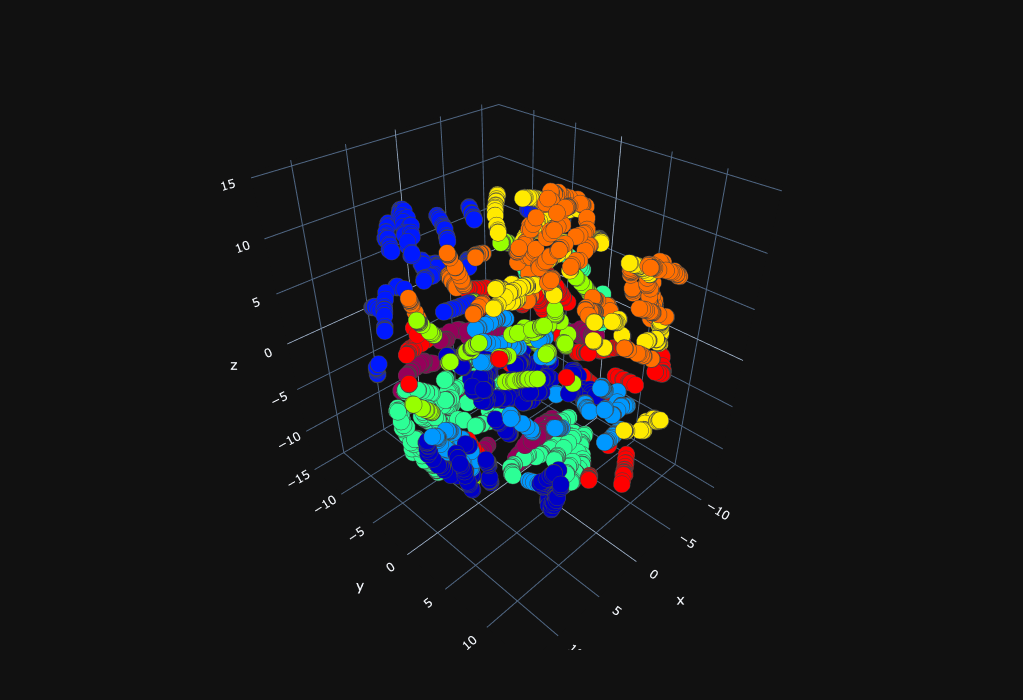

In [11]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])


## UMAP

**Définition:**
```
UMAP (Uniform Manifold Approximation and Projection) est un algorithme de réduction de dimension non linéaire qui utilise une approximation de variété uniforme pour représenter les relations entre les échantillons d'origine dans un espace de dimension réduite.
```
**Quand l'utiliser:**
```
UMAP peut être utilisé lorsque vous souhaitez préserver la structure globale des données à haute dimension tout en les réduisant à une dimension inférieure.
```
**Pourquoi l'utiliser:**
```
UMAP est capable de capturer les structures non linéaires et les relations complexes entre les échantillons dans un espace de dimension réduite. Il est également plus rapide que d'autres algorithmes de réduction de dimension non linéaire.
```
**Points forts:**
```
Capable de capturer des structures non linéaires complexes dans les données.
Bonne préservation des relations globales entre les échantillons.
Performances rapides par rapport à d'autres méthodes non linéaires de réduction de dimension.
```
**Points faibles:**
```
L'interprétation des résultats peut être plus complexe en raison de la nature probabiliste de l'algorithme.
La visualisation obtenue peut varier en fonction des paramètres choisis.
```

In [14]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 7.518340826034546 seconds


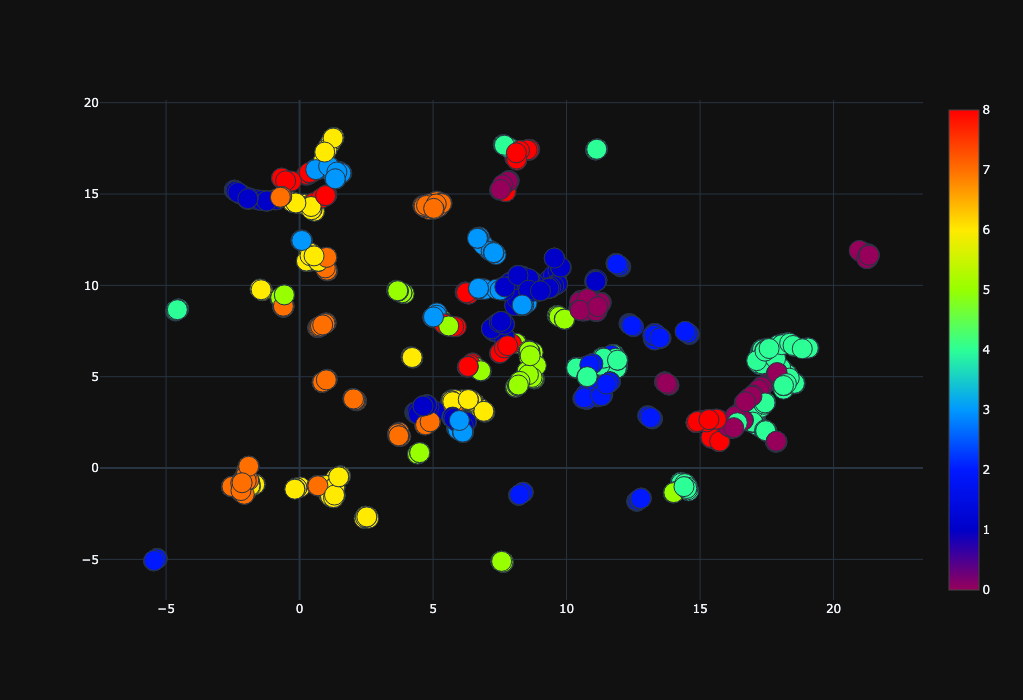

In [15]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

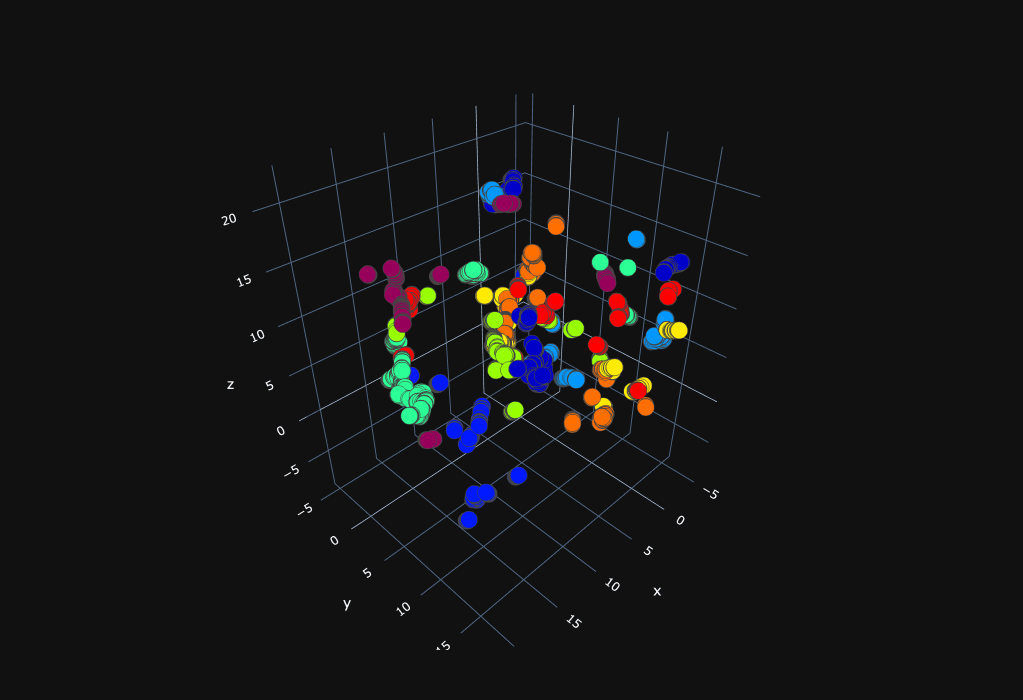

In [16]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

## LDA

**Définition:**
```
LDA (Linear Discriminant Analysis) est un algorithme d'apprentissage supervisé utilisé pour la classification et la réduction de dimension. Il cherche à trouver une combinaison linéaire des variables d'entrée qui permet de maximiser la séparation entre les classes tout en minimisant la variance interne de chaque classe.
```
**Quand l'utiliser:**
```
LDA peut être utilisé lorsque vous avez des données étiquetées et que vous souhaitez réduire la dimension tout en maximisant la séparation entre les classes.
```
**Pourquoi l'utiliser:**
```
LDA permet de réduire la dimension des données tout en conservant les informations discriminantes pour la classification. Il peut également être utilisé comme étape préliminaire à d'autres algorithmes d'apprentissage automatique.
```
**Points forts:**
```
Réduction de la dimension tout en préservant les informations discriminantes pour la classification.
Capacité à gérer plusieurs classes de données.
Bonne interprétabilité des résultats.
```
**Points faibles:**
```
LDA suppose que les variables d'entrée sont distribuées normalement et ont des variances égales dans chaque classe.
LDA peut être sensible aux valeurs aberrantes dans les données.
Ne fonctionne pas bien avec des données non linéairement séparables.
```

In [17]:
start = time.time()
X_LDA = LDA(n_components=3).fit_transform(x,y)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.6939921379089355 seconds


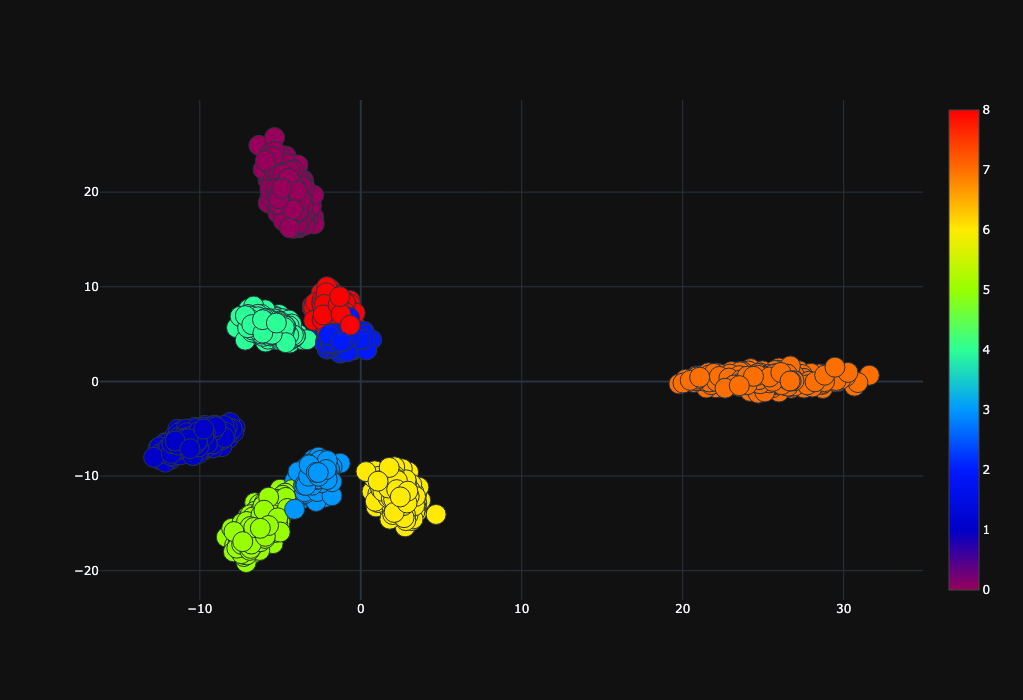

In [18]:
plot_2d(X_LDA[:, 0],X_LDA[:, 1])

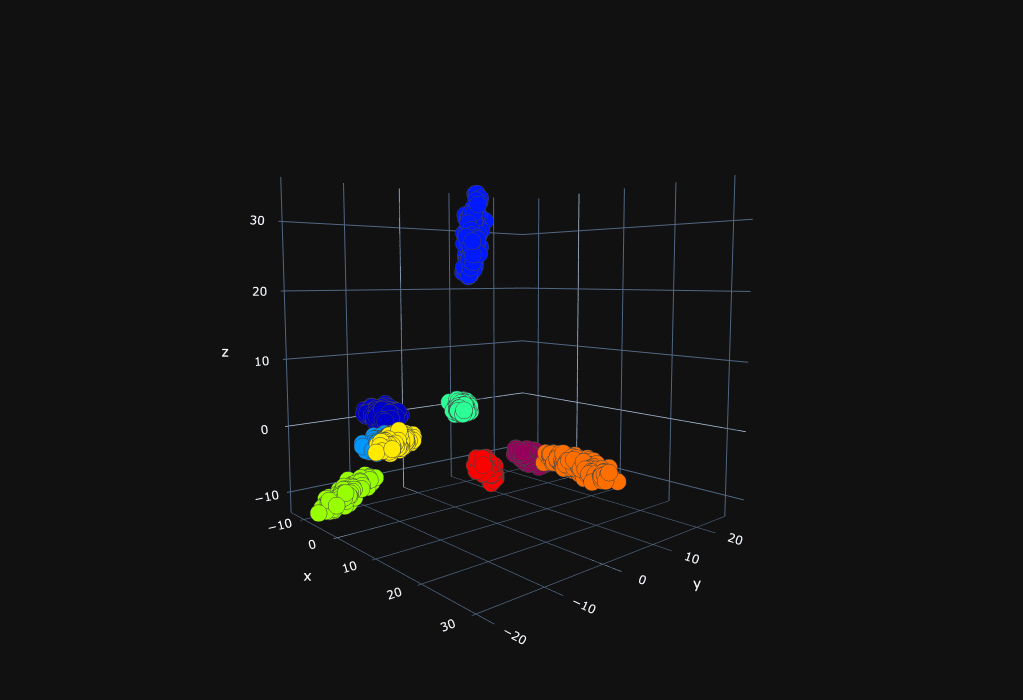

In [19]:
plot_3d(X_LDA[:, 0],X_LDA[:, 1],X_LDA[:, 2])